In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
cab_data = pd.read_csv('C:\\Users\\Rashmikant\\Desktop\\Data_Galcier\\DataSets\\Cab_Data.csv')
customer_id = pd.read_csv('C:\\Users\\Rashmikant\\Desktop\\Data_Galcier\\DataSets\\Customer_ID.csv')
transaction_id =pd.read_csv('C:\\Users\\Rashmikant\\Desktop\\Data_Galcier\\DataSets\\Transaction_ID.csv')

In [7]:
City = pd.read_csv('C:\\Users\\Rashmikant\\Desktop\\Data_Galcier\\DataSets\\City.csv')

In [8]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [9]:
cab_data.shape

(359392, 7)

In [10]:
cab_data_uni = cab_data.nunique()
print(cab_data_uni)

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64


In [11]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [12]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [13]:
transaction_id['Transaction ID'].nunique()

440098

In [14]:
UniValue = transaction_id.nunique()
print(UniValue)

Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64


In [15]:
merged_df =pd.merge(cab_data,transaction_id, on='Transaction ID',how='inner')
merged_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [16]:
merged_df.shape

(359392, 9)

In [17]:
cols = list(merged_df.columns.values)
print(cols)

['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode']


In [18]:
first_column = merged_df.pop ('Customer ID')
merged_df.insert(0, 'Customer ID', first_column)
merged_df.head()

,Customer ID,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode
0,29290,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Card
1,27703,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Card
2,28712,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Cash
3,28020,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Cash
4,27182,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Card


In [19]:
merged_df = pd.merge(merged_df,customer_id, on = 'Customer ID', how='inner')
merged_df.head()

,Customer ID,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month)
0,29290,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813
1,29290,10351127,21-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Cash,Male,28,10813
2,29290,10412921,23-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Card,Male,28,10813
3,27703,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,Male,27,9237
4,27703,10320494,21-04-2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Card,Male,27,9237


In [20]:
merged_df.shape

(359392, 12)

In [21]:
print(merged_df.isnull().sum())

Customer ID           0
Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


In [22]:
df =pd.DataFrame.copy(merged_df)

In [23]:
df.head()

,Customer ID,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month)
0,29290,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813
1,29290,10351127,21-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Cash,Male,28,10813
2,29290,10412921,23-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Card,Male,28,10813
3,27703,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,Male,27,9237
4,27703,10320494,21-04-2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Card,Male,27,9237


In [24]:
df.shape

(359392, 12)

In [25]:
df.nunique()

Customer ID            46148
Transaction ID        359392
Date of Travel          1095
Company                    2
City                      19
KM Travelled             874
Price Charged          99176
Cost of Trip           16291
Payment_Mode               2
Gender                     2
Age                       48
Income (USD/Month)     22725
dtype: int64

# Investigations
1) Is there any correlation between poulation of the  city, number of user per city and distance travelled per city.
2)

In [27]:
df['Profit'] = (df['Price Charged'] - df['Cost of Trip'])
print(df.head())

   Customer ID  Transaction ID Date of Travel     Company        City  \
0        29290        10000011     08-01-2016    Pink Cab  ATLANTA GA   
1        29290        10351127     21-07-2018  Yellow Cab  ATLANTA GA   
2        29290        10412921     23-11-2018  Yellow Cab  ATLANTA GA   
3        27703        10000012     06-01-2016    Pink Cab  ATLANTA GA   
4        27703        10320494     21-04-2018  Yellow Cab  ATLANTA GA   

   KM Travelled  Price Charged  Cost of Trip Payment_Mode Gender  Age  \
0         30.45         370.95      313.6350         Card   Male   28   
1         26.19         598.70      317.4228         Cash   Male   28   
2         42.55         792.05      597.4020         Card   Male   28   
3         28.62         358.52      334.8540         Card   Male   27   
4         36.38         721.10      467.1192         Card   Male   27   

   Income (USD/Month)    Profit  
0               10813   57.3150  
1               10813  281.2772  
2               1081

In [28]:
df['Profit per KM'] = (df['Profit']/df['KM Travelled'])
print(df.head())

   Customer ID  Transaction ID Date of Travel     Company        City  \
0        29290        10000011     08-01-2016    Pink Cab  ATLANTA GA   
1        29290        10351127     21-07-2018  Yellow Cab  ATLANTA GA   
2        29290        10412921     23-11-2018  Yellow Cab  ATLANTA GA   
3        27703        10000012     06-01-2016    Pink Cab  ATLANTA GA   
4        27703        10320494     21-04-2018  Yellow Cab  ATLANTA GA   

   KM Travelled  Price Charged  Cost of Trip Payment_Mode Gender  Age  \
0         30.45         370.95      313.6350         Card   Male   28   
1         26.19         598.70      317.4228         Cash   Male   28   
2         42.55         792.05      597.4020         Card   Male   28   
3         28.62         358.52      334.8540         Card   Male   27   
4         36.38         721.10      467.1192         Card   Male   27   

   Income (USD/Month)    Profit  Profit per KM  
0               10813   57.3150       1.882266  
1               10813  2

In [29]:
cab_profit = df.groupby(['Company'])[['Profit']].sum()
print(cab_profit.round())


                Profit
Company               
Pink Cab     5307328.0
Yellow Cab  44020373.0


In [30]:
city_profit = df.groupby(['City'])[['Profit']].sum()
print(city_profit.round())

                    Profit
City                      
ATLANTA GA        842433.0
AUSTIN TX         526701.0
BOSTON MA        1768719.0
CHICAGO IL       3387313.0
DALLAS TX        1128733.0
DENVER CO         397585.0
LOS ANGELES CA   4411709.0
MIAMI FL          758301.0
NASHVILLE TN      149532.0
NEW YORK NY     27962555.0
ORANGE COUNTY     457002.0
PHOENIX AZ        192941.0
PITTSBURGH PA      85166.0
SACRAMENTO CA     117326.0
SAN DIEGO CA     1587163.0
SEATTLE WA        604685.0
SILICON VALLEY   1316705.0
TUCSON AZ         140261.0
WASHINGTON DC    3492870.0


Text(0, 0.5, 'Profit')

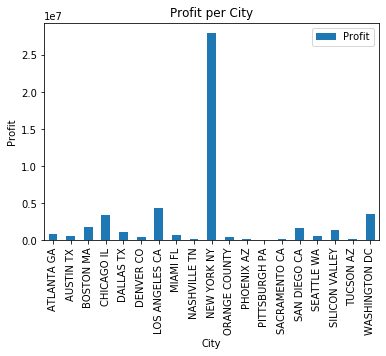

In [31]:
city_profit.plot(kind='Bar')
plt.title("Profit per City")

plt.ylabel("Profit")

In [32]:
city_dist = df.groupby(['City'])[['KM Travelled']].sum()
print(city_dist.round())

                KM Travelled
City                        
ATLANTA GA          168644.0
AUSTIN TX           109207.0
BOSTON MA           670388.0
CHICAGO IL         1281704.0
DALLAS TX           157782.0
DENVER CO            85870.0
LOS ANGELES CA     1088736.0
MIAMI FL            145418.0
NASHVILLE TN         68325.0
NEW YORK NY        2248810.0
ORANGE COUNTY        88827.0
PHOENIX AZ           45825.0
PITTSBURGH PA        29706.0
SACRAMENTO CA        53861.0
SAN DIEGO CA        460504.0
SEATTLE WA          180904.0
SILICON VALLEY      193713.0
TUCSON AZ            43230.0
WASHINGTON DC       989038.0


In [33]:
print(City)

                City  Population   Users
0        NEW YORK NY     8405837  302149
1         CHICAGO IL     1955130  164468
2     LOS ANGELES CA     1595037  144132
3           MIAMI FL     1339155   17675
4     SILICON VALLEY     1177609   27247
5      ORANGE COUNTY     1030185   12994
6       SAN DIEGO CA      959307   69995
7         PHOENIX AZ      943999    6133
8          DALLAS TX      942908   22157
9         ATLANTA GA      814885   24701
10         DENVER CO      754233   12421
11         AUSTIN TX      698371   14978
12        SEATTLE WA      671238   25063
13         TUCSON AZ      631442    5712
14  SAN FRANCISCO CA      629591  213609
15     SACRAMENTO CA      545776    7044
16     PITTSBURGH PA      542085    3643
17     WASHINGTON DC      418859  127001
18      NASHVILLE TN      327225    9270
19         BOSTON MA      248968   80021


In [34]:
city_KM = pd.merge(City,city_dist, on = 'City', how='inner')
print(city_KM.head())

             City  Population   Users  KM Travelled
0     NEW YORK NY     8405837  302149    2248809.74
1      CHICAGO IL     1955130  164468    1281704.39
2  LOS ANGELES CA     1595037  144132    1088735.65
3        MIAMI FL     1339155   17675     145418.17
4  SILICON VALLEY     1177609   27247     193712.97


In [35]:
city_KM.corr()


,Population,Users,KM Travelled
Population,1.000000,0.815582,0.800419
Users,0.815582,1.000000,0.998921
KM Travelled,0.800419,0.998921,1.000000


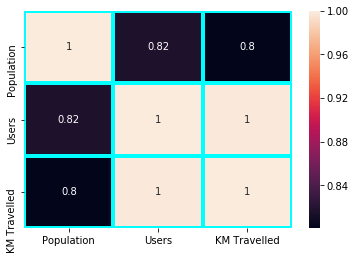

In [36]:
sns.heatmap(city_KM.corr(),annot = True, linewidths=3, linecolor='Cyan')

So,this shows that there is high correlation beteween population of the city, Cab users in the city and distance travelled by users. That means citys with more population have more cab users in turn more distance travelled. 

In [37]:
customer= df.groupby(['Customer ID'])[['Transaction ID']].count()
print(customer)

             Transaction ID
Customer ID                
1                        29
2                        40
3                        46
4                        26
5                        31
6                        28
7                        36
8                        35
9                        40
10                       24
11                       43
12                       30
13                       34
14                       30
15                       38
16                       27
17                       34
18                       36
19                       41
20                       30
21                       30
22                       41
23                       35
24                       23
25                       39
26                       38
27                       38
28                       38
29                       30
30                       32
...                     ...
59971                     7
59972                    12
59973               

In [105]:
df_company = df.groupby('Company')
df_company.first()

,Customer ID,Transaction ID,Date of Travel,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Profit per KM
Company,,,,,,,,,,,,,
Pink Cab,29290,10000011,08-01-2016,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813,57.3150,1.882266
Yellow Cab,29290,10351127,21-07-2018,ATLANTA GA,26.19,598.70,317.4228,Cash,Male,28,10813,281.2772,10.739870


In [106]:
pink_cab=df_company.get_group('Pink Cab')
print(pink_cab)

        Customer ID  Transaction ID Date of Travel            City  \
0             29290        10000011     08-01-2016      ATLANTA GA   
3             27703        10000012     06-01-2016      ATLANTA GA   
6             27703        10395626     27-10-2018      ATLANTA GA   
7             28712        10000013     02-01-2016      ATLANTA GA   
11            28020        10000014     07-01-2016      ATLANTA GA   
12            28020        10094994     27-10-2016      ATLANTA GA   
14            28020        10326470     11-05-2018      ATLANTA GA   
15            27182        10000015     03-01-2016      ATLANTA GA   
19            27318        10000016     07-01-2016      ATLANTA GA   
20            27318        10072285     04-09-2016      ATLANTA GA   
22            27318        10196539     19-07-2017      ATLANTA GA   
24            33788        10000017     03-01-2016       AUSTIN TX   
27            34106        10000018     07-01-2016       AUSTIN TX   
30            59799 

In [107]:
#converting series into data frame
pink_cab = pd.DataFrame(pink_cab)
#print(pink_cab)

In [112]:
 
ts = pd.DataFrame(pink_cab,columns=['Date of Travel','Profit'])
print(ts)

       Date of Travel   Profit
0          08-01-2016   57.315
3          06-01-2016   23.666
6          27-10-2018   25.096
7          02-01-2016   27.568
11         07-01-2016   25.798
12         27-10-2016   37.292
14         11-05-2018   43.190
15         03-01-2016   16.844
19         07-01-2016    9.406
20         04-09-2016   59.890
22         19-07-2017   30.084
24         03-01-2016  100.950
27         07-01-2016   88.210
30         12-01-2016   44.730
37         26-09-2017   65.700
39         06-01-2016   43.724
45         08-11-2017  176.080
46         03-01-2018  108.750
50         24-05-2018   99.800
51         21-06-2018    5.614
53         11-01-2016   95.630
55         18-05-2016  -79.088
64         06-01-2016   97.090
66         21-07-2016   33.683
75         28-04-2018  101.610
81         11-01-2016   23.610
84         28-08-2016   11.352
93         10-11-2018    8.902
95         06-01-2016   78.900
97         03-04-2016  276.350
...               ...      ...
359306  

In [113]:
ts = ts.rename(columns = {'Date of Travel': 'Date'}, inplace = False)
print(ts)

              Date   Profit
0       08-01-2016   57.315
3       06-01-2016   23.666
6       27-10-2018   25.096
7       02-01-2016   27.568
11      07-01-2016   25.798
12      27-10-2016   37.292
14      11-05-2018   43.190
15      03-01-2016   16.844
19      07-01-2016    9.406
20      04-09-2016   59.890
22      19-07-2017   30.084
24      03-01-2016  100.950
27      07-01-2016   88.210
30      12-01-2016   44.730
37      26-09-2017   65.700
39      06-01-2016   43.724
45      08-11-2017  176.080
46      03-01-2018  108.750
50      24-05-2018   99.800
51      21-06-2018    5.614
53      11-01-2016   95.630
55      18-05-2016  -79.088
64      06-01-2016   97.090
66      21-07-2016   33.683
75      28-04-2018  101.610
81      11-01-2016   23.610
84      28-08-2016   11.352
93      10-11-2018    8.902
95      06-01-2016   78.900
97      03-04-2016  276.350
...            ...      ...
359306  01-01-2018   62.950
359307  08-01-2018  107.968
359308  01-01-2018   58.690
359309  06-01-2018  

In [116]:
#ts['Date'] = pd.to_datetime(ts['Date'])
#print(ts['Date'])

ts["Date"]=pd.to_datetime(ts.Date,format='%d-%m-%Y')

In [117]:
ts

,Date,Profit
0,2016-01-08,57.315
3,2016-01-06,23.666
6,2018-10-27,25.096
7,2016-01-02,27.568
11,2016-01-07,25.798
12,2016-10-27,37.292
14,2018-05-11,43.190
15,2016-01-03,16.844
19,2016-01-07,9.406
20,2016-09-04,59.890


In [115]:
for i in (ts):
    i['year']=i.Date.dt.year
    i['month']=i.Datet.dt.month
    i['day']=i.Datet.dt.day
    

AttributeError: 'str' object has no attribute 'Date'

In [103]:
print(ts.dtypes)

Date      datetime64[ns]
Profit           float64
dtype: object


In [104]:
ts.index=ts['Date']
print(ts)

                 Date   Profit
Date                          
2016-08-01 2016-08-01   57.315
2016-06-01 2016-06-01   23.666
2018-10-27 2018-10-27   25.096
2016-02-01 2016-02-01   27.568
2016-07-01 2016-07-01   25.798
2016-10-27 2016-10-27   37.292
2018-11-05 2018-11-05   43.190
2016-03-01 2016-03-01   16.844
2016-07-01 2016-07-01    9.406
2016-04-09 2016-04-09   59.890
2017-07-19 2017-07-19   30.084
2016-03-01 2016-03-01  100.950
2016-07-01 2016-07-01   88.210
2016-12-01 2016-12-01   44.730
2017-09-26 2017-09-26   65.700
2016-06-01 2016-06-01   43.724
2017-08-11 2017-08-11  176.080
2018-03-01 2018-03-01  108.750
2018-05-24 2018-05-24   99.800
2018-06-21 2018-06-21    5.614
2016-11-01 2016-11-01   95.630
2016-05-18 2016-05-18  -79.088
2016-06-01 2016-06-01   97.090
2016-07-21 2016-07-21   33.683
2018-04-28 2018-04-28  101.610
2016-11-01 2016-11-01   23.610
2016-08-28 2016-08-28   11.352
2018-10-11 2018-10-11    8.902
2016-06-01 2016-06-01   78.900
2016-03-04 2016-03-04  276.350
...     

In [95]:
for i in (ts['Date']):
    i['year']=i.Date.dt.year
    i['month']=i.Date.dt.month
    i['day']=i.Date.dt.day
   

AttributeError: 'Timestamp' object has no attribute 'Date'

In [96]:
plt.plot(ts,label='profit')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001E20E2ABD08> (for post_execute):


ValueError: view limit minimum -37084.013 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -37084.013 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [119]:
yellow_cab=df_company.get_group('Yellow Cab')
print(yellow_cab)

        Customer ID  Transaction ID Date of Travel            City  \
1             29290        10351127     21-07-2018      ATLANTA GA   
2             29290        10412921     23-11-2018      ATLANTA GA   
4             27703        10320494     21-04-2018      ATLANTA GA   
5             27703        10324737     04-05-2018      ATLANTA GA   
8             28712        10079404     21-09-2016      ATLANTA GA   
9             28712        10186994     23-06-2017      ATLANTA GA   
10            28712        10320493     21-04-2018      ATLANTA GA   
13            28020        10140112     27-01-2017      ATLANTA GA   
16            27182        10099482     06-11-2016      ATLANTA GA   
17            27182        10179732     03-06-2017      ATLANTA GA   
18            27182        10293463     13-01-2018      ATLANTA GA   
21            27318        10110211     19-11-2016      ATLANTA GA   
23            27318        10197294     16-07-2017      ATLANTA GA   
25            33788 